# Name: Alexander Tang


<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

# Introduction  

The purpose of this project is to analyze trends within the NBA by utilizing pandas dataframes, principal component analysis, logistic regression, and heatmaps. Specifically, this project analyzes:
-  The average number of points per game for players who won All NBA First, Second, and Third teams (not the All Defensive Teams), as well as for players who were in the All-Star Game (not the rookie all-star game)
-  The average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)
-  The career outcome (Elite, All-Star, Starter, Rotation, Roster, Out of the League) of nba players based on various statistics

This project also includes a model that predicts nba career outcomes for current players. This model utilizes principal component analysis, a logistic regression classifier, and a heatmap. The model outputs the probability of each player's career outcome (Elite, All-Star, Starter, Rotation, Roster, Out of the League).

This project also includes a relatively simple rebounds prediction model.

The process of this project includes a problem statement, data cleaning and wrangling, exploratory data analysis, modelling, results, limitations, and potential weaknesses. 

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).**

# Problem Statement

The game of basketball is constantly changing, especially with the latest innovations in data analytics and machine learning. One way to utilize data analytics to our advantage is to try and extract trends/insights from the mass amount of data being collected by the NBA every game. These results will hopefully provide an advantage to basketball organizations who are looking for an edge above their opponents.

# Setup and Data    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, I am going to work with data relating to player awards and statistics. I'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?




In [2]:
awards

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,...,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4324,2015,1626170.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4325,2015,1626202.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4326,2015,1626273.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0
4327,2018,1628971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0


In [3]:
# Create new df from awards with just nbapersonid, All NBA First Team, and season

awards_1st = awards[['nbapersonid', 'All NBA First Team', 'season']].copy()
awards_1st = awards_1st.dropna()
awards_1st.drop(awards_1st[awards_1st['All NBA First Team'] == 0.0].index, inplace = True)
awards_1st

,nbapersonid,All NBA First Team,season
0,708.0,1.0,2007
4,977.0,1.0,2007
29,2544.0,1.0,2007
32,2730.0,1.0,2007
35,101108.0,1.0,2007
...,...,...,...
658,203507.0,1.0,2021
661,203999.0,1.0,2021
663,1626164.0,1.0,2021
668,1628369.0,1.0,2021


In [4]:
player_data

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8487,1630648,Jordan Schakel,2021,NaN,2021,1610612764,WAS,4,0,30,...,0.000,0.078,0.191,-0.2,0.0,-0.1,-8.6,-4.4,-13.0,-0.1
8488,1630557,Corey Kispert,2021,15.0,2021,1610612764,WAS,77,36,1801,...,0.010,0.085,0.146,1.6,0.7,2.3,-0.8,-1.5,-2.3,-0.1
8489,1628398,Kyle Kuzma,2017,27.0,2021,1610612764,WAS,66,66,2204,...,0.022,0.141,0.242,0.0,2.0,2.0,0.2,-0.4,-0.2,1.0
8490,203526,Raul Neto,2013,47.0,2021,1610612764,WAS,70,19,1372,...,0.002,0.139,0.184,0.7,0.8,1.5,-2.5,-0.5,-3.0,-0.4


In [5]:
# Create new df from player_data df with just nbapersonid, points, games, and season

player_data_filt = player_data[['nbapersonid', 'points', 'games', 'season']].copy()
player_data_filt['nbapersonid'] = player_data_filt['nbapersonid'].astype(float)
player_data_filt

,nbapersonid,points,games,season
0,2585.0,322,62,2007
1,200780.0,35,35,2007
2,2746.0,1394,81,2007
3,201151.0,235,56,2007
4,101136.0,200,35,2007
...,...,...,...,...
8487,1630648.0,5,4,2021
8488,1630557.0,634,77,2021
8489,1628398.0,1130,66,2021
8490,203526.0,526,70,2021


In [6]:
# Merge awards_1st and player_data_filt to see NBA All First Team points, games, and season

merged_1st = player_data_filt.merge(awards_1st, left_on = ['nbapersonid', 'season'],
                                   right_on = ['nbapersonid', 'season'], how = 'inner')
merged_1st

,nbapersonid,points,games,season,All NBA First Team
0,708.0,1337,71,2007,1.0
1,2544.0,2250,75,2007,1.0
2,977.0,2323,82,2007,1.0
3,101108.0,1684,80,2007,1.0
4,2730.0,1695,82,2007,1.0
...,...,...,...,...,...
70,1628369.0,2046,76,2021,1.0
71,1629029.0,1847,65,2021,1.0
72,203999.0,2004,74,2021,1.0
73,203507.0,2002,67,2021,1.0


In [7]:
# define a function to average the points per game of all the All NBA First Team players

def avg_pps(df):
    total_points = df['points'].sum()
    total_games = df['games'].sum()
    ppg = total_points / total_games
    return ppg

avg_pps(merged_1st)

25.845622956774427

In [8]:
# Repeat same steps for NBA All Second Team

awards_2nd = awards[['nbapersonid', 'All NBA Second Team']].copy()
awards_2nd = awards_2nd.dropna()
awards_2nd.drop(awards_2nd[awards_2nd['All NBA Second Team'] == 0.0].index, inplace = True)

merged_2nd = awards_2nd.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid', right_on = 'nbapersonid')
avg_pps(merged_2nd)

20.200686043753535

In [9]:
# Repeat same steps for NBA All Third Team

awards_3rd = awards[['nbapersonid', 'All NBA Third Team']].copy()
awards_3rd = awards_3rd.dropna()
awards_3rd.drop(awards_3rd[awards_3rd['All NBA Third Team'] == 0.0].index, inplace = True)

merged_3rd = awards_3rd.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid', right_on = 'nbapersonid')
avg_pps(merged_3rd)

18.079576680282212

In [10]:
# Repeat same steps for players who made the all star game

awards_allstar = awards[['nbapersonid', 'all_star_game']].copy()
awards_allstar = awards_allstar.dropna()
awards_allstar.drop(awards_allstar[awards_allstar['all_star_game'] == False].index, inplace = True)

merged_allstar = awards_allstar.merge(player_data_filt, how = 'inner', left_on = 'nbapersonid',
                                      right_on = 'nbapersonid')
avg_pps(merged_allstar)

19.392791988859823

<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 25.8 points per game  
2nd Team: 20.2 points per game  
3rd Team: 18.1 points per game  
All-Star: 19.4 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? I will limit my sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [11]:
# Create new df from awards with just All NBA First, Second and Third Team players

awards_allnba = awards[['season', 'nbapersonid', 'All NBA First Team', 'All NBA Second Team',
                        'All NBA Third Team']].copy()
awards_allnba = awards_allnba.dropna()
awards_allnba = awards_allnba[((awards_allnba["All NBA First Team"] != 0.0) |
                              (awards_allnba["All NBA Second Team"] != 0.0) |
                              (awards_allnba["All NBA Third Team"] != 0.0))]
awards_allnba

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
666,2021,1627783.0,0.0,0.0,1.0
668,2021,1628369.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0
677,2021,1629029.0,1.0,0.0,0.0


In [12]:
# Replace duplicate All NBA player seasons with the earliest season

awards_allnba = awards_allnba.drop_duplicates('nbapersonid', keep = 'first')
awards_allnba

,season,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team
0,2007,708.0,1.0,0.0,0.0
3,2007,959.0,0.0,1.0,0.0
4,2007,977.0,1.0,0.0,0.0
6,2007,1495.0,0.0,1.0,0.0
7,2007,1503.0,0.0,0.0,1.0
...,...,...,...,...,...
614,2020,203078.0,0.0,0.0,1.0
620,2020,203944.0,0.0,1.0,0.0
663,2021,1626164.0,1.0,0.0,0.0
676,2021,1629027.0,0.0,0.0,1.0


In [13]:
# Filter player_data to just nbapersonid, player, draftyear, and season

player_data_filt2 = player_data[['nbapersonid', 'player', 'draftyear', 'season']].copy()

In [14]:
# Merge awards_allnba and player_data_filt2

merged_awards_allnba = player_data_filt2.merge(awards_allnba, how = 'inner',
                                                left_on = ['nbapersonid', 'season'],
                                               right_on = ['nbapersonid', 'season'])
merged_awards_allnba

,nbapersonid,player,draftyear,season,All NBA First Team,All NBA Second Team,All NBA Third Team
0,708,Kevin Garnett,1995,2007,1.0,0.0,0.0
1,1718,Paul Pierce,1998,2007,0.0,0.0,1.0
2,2544,LeBron James,2003,2007,1.0,0.0,0.0
3,1717,Dirk Nowitzki,1998,2007,0.0,1.0,0.0
4,2397,Yao Ming,2002,2007,0.0,0.0,1.0
...,...,...,...,...,...,...,...
69,203944,Julius Randle,2014,2020,0.0,1.0,0.0
70,203078,Bradley Beal,2012,2020,0.0,0.0,1.0
71,1629027,Trae Young,2018,2021,0.0,0.0,1.0
72,1629630,Ja Morant,2019,2021,0.0,1.0,0.0


In [15]:
# Remove players who were drafted before 2007

merged_awards_allnba = merged_awards_allnba[merged_awards_allnba['draftyear'] >= 2007]

In [16]:
# Subtract all values of draftyear column from season column and average the values

avg_exp = (merged_awards_allnba['season'].sum() - merged_awards_allnba['draftyear'].sum()) / len(merged_awards_allnba)
avg_exp

3.682926829268293

<strong><span style="color:red">ANSWER 2:</span></strong>  

3.7 Years  

## Data Cleaning Interlude  

I'm going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, I'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. I'll assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. I will use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. All answers will be rounded to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production.


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [17]:
# Filter player_data into players drafted in 2010 and later

player_data_2010 = player_data[player_data['draftyear'] == 2010].copy()
player_data_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
1561,202377,Pape Sy,2010,53.0,2010,1610612737,ATL,3,0,21,...,0.000,0.291,0.233,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0
1563,202348,Jordan Crawford,2010,27.0,2010,1610612737,ATL,16,0,160,...,0.000,0.158,0.281,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1
1571,202345,Damion James,2010,24.0,2010,1610612751,BKN,25,9,403,...,0.023,0.178,0.162,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1
1572,202324,Derrick Favors,2010,3.0,2010,1610612751,BKN,56,23,1091,...,0.029,0.146,0.163,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5
1577,202386,Ben Uzoh,2010,NaN,2010,1610612751,BKN,42,0,438,...,0.014,0.129,0.205,0.2,0.2,0.5,0.4,-1.0,-0.6,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.017,0.045,0.134,0.8,0.7,1.4,-2.3,0.3,-2.1,0.0
8444,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,0.078,0.116,0.171,3.4,2.3,5.8,0.6,1.4,2.1,1.2
8451,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.034,0.000,0.135,0.2,0.0,0.2,4.6,-0.3,4.4,0.0
8471,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.018,0.145,0.209,0.1,0.5,0.7,-0.9,-0.6,-1.5,0.1


In [18]:
# Create a function to calculate the adjustment factor for 2011, 2019, and 2020

def adjustment(row):
    if row['season'] == 2011:
        return 82.0/66
    elif row['season'] == 2019 or row['season'] == 2020:
        return 82.0/72
    else:
        return 1.0

In [19]:
# Add the adjustment factor for each season

player_data_2010['adjustment'] = player_data_2010.apply(adjustment, axis=1)
player_data_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,adjustment
1561,202377,Pape Sy,2010,53.0,2010,1610612737,ATL,3,0,21,...,0.291,0.233,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0,1.0
1563,202348,Jordan Crawford,2010,27.0,2010,1610612737,ATL,16,0,160,...,0.158,0.281,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1,1.0
1571,202345,Damion James,2010,24.0,2010,1610612751,BKN,25,9,403,...,0.178,0.162,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1,1.0
1572,202324,Derrick Favors,2010,3.0,2010,1610612751,BKN,56,23,1091,...,0.146,0.163,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5,1.0
1577,202386,Ben Uzoh,2010,NaN,2010,1610612751,BKN,42,0,438,...,0.129,0.205,0.2,0.2,0.5,0.4,-1.0,-0.6,0.2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.045,0.134,0.8,0.7,1.4,-2.3,0.3,-2.1,0.0,1.0
8444,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,0.116,0.171,3.4,2.3,5.8,0.6,1.4,2.1,1.2,1.0
8451,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.000,0.135,0.2,0.0,0.2,4.6,-0.3,4.4,0.0,1.0
8471,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.145,0.209,0.1,0.5,0.7,-0.9,-0.6,-1.5,0.1,1.0


In [20]:
# Create functions to adjust games and minutes

def adjust_games_start(row):
    return round(row['games_start'] * row['adjustment'])

def adjust_minutes_played(row):
    return round(row['mins'] * row['adjustment'])

In [21]:
# Add the adjusted games and minutes

player_data_2010['adj_games_start'] = player_data_2010.apply(adjust_games_start, axis=1)
player_data_2010['adj_min'] = player_data_2010.apply(adjust_minutes_played, axis=1)
player_data_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,adjustment,adj_games_start,adj_min
1561,202377,Pape Sy,2010,53.0,2010,1610612737,ATL,3,0,21,...,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0,1.0,0,21
1563,202348,Jordan Crawford,2010,27.0,2010,1610612737,ATL,16,0,160,...,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1,1.0,0,160
1571,202345,Damion James,2010,24.0,2010,1610612751,BKN,25,9,403,...,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1,1.0,9,403
1572,202324,Derrick Favors,2010,3.0,2010,1610612751,BKN,56,23,1091,...,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5,1.0,23,1091
1577,202386,Ben Uzoh,2010,NaN,2010,1610612751,BKN,42,0,438,...,0.2,0.2,0.5,0.4,-1.0,-0.6,0.2,1.0,0,438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.8,0.7,1.4,-2.3,0.3,-2.1,0.0,1.0,18,653
8444,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,3.4,2.3,5.8,0.6,1.4,2.1,1.2,1.0,8,1162
8451,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.2,0.0,0.2,4.6,-0.3,4.4,0.0,1.0,0,26
8471,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.1,0.5,0.7,-0.9,-0.6,-1.5,0.1,1.0,0,615


In [22]:
# We only care about seasons that happen at least than 4 years after the draft year

player_data_2010 = player_data_2010[player_data_2010['season']  >= player_data_2010['draftyear'] + 4]
player_data_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,adjustment,adj_games_start,adj_min
3714,202366,Jerome Jordan,2010,44.0,2014,1610612751,BKN,44,0,383,...,0.9,0.3,1.2,-0.6,-0.6,-1.2,0.1,1.0,0,383
3726,202340,Avery Bradley,2010,19.0,2014,1610612738,BOS,77,77,2428,...,0.4,2.1,2.5,-1.5,-0.6,-2.2,-0.1,1.0,77,2428
3734,202323,Evan Turner,2010,2.0,2014,1610612738,BOS,82,57,2260,...,-0.3,2.8,2.5,-1.8,0.8,-1.0,0.6,1.0,57,2260
3753,202362,Lance Stephenson,2010,40.0,2014,1610612766,CHA,61,25,1573,...,-2.7,1.8,-0.9,-4.3,-0.1,-4.5,-1.0,1.0,25,1573
3790,202329,Al-Farouq Aminu,2010,8.0,2014,1610612742,DAL,74,3,1366,...,1.2,2.0,3.3,-0.7,1.5,0.7,1.0,1.0,3,1366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.8,0.7,1.4,-2.3,0.3,-2.1,0.0,1.0,18,653
8444,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,3.4,2.3,5.8,0.6,1.4,2.1,1.2,1.0,8,1162
8451,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.2,0.0,0.2,4.6,-0.3,4.4,0.0,1.0,0,26
8471,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.1,0.5,0.7,-0.9,-0.6,-1.5,0.1,1.0,0,615


In [23]:
# We need information about awards, so we prepare a dataset to merge from.
# We need information about All-NBA First, Second, Third teams, MVP, DPOY, and All-star selections.

awards_data_prep = awards.copy()
awards_data_prep.keys()
awards_data_prep = awards_data_prep[['nbapersonid', 'season', 'All NBA First Team',
                                     'All NBA Second Team', 'All NBA Third Team', 'all_star_game',
                                     'Defensive Player Of The Year_rk', 'Most Valuable Player_rk']]
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,True,1.0,3.0
1,947.0,2007,0.0,0.0,0.0,True,NaN,NaN
2,948.0,2007,0.0,0.0,0.0,NaN,2.0,NaN
3,959.0,2007,0.0,1.0,0.0,True,NaN,9.0
4,977.0,2007,1.0,0.0,0.0,True,5.0,1.0
...,...,...,...,...,...,...,...,...
4324,1626170.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4325,1626202.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4326,1626273.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4327,1628971.0,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# Get only seasons that we care about

awards_data_prep = awards_data_prep[(awards_data_prep['All NBA First Team'] == 1.0) |
                                    (awards_data_prep['All NBA Second Team'] == 1.0) |
                                    (awards_data_prep['All NBA Third Team'] == 1.0) |
                                    (awards_data_prep['all_star_game'] == True) |
                                    (awards_data_prep['Defensive Player Of The Year_rk'] == 1.0) |
                                    (awards_data_prep['Most Valuable Player_rk'] == 1.0)]
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,True,1.0,3.0
1,947.0,2007,0.0,0.0,0.0,True,NaN,NaN
3,959.0,2007,0.0,1.0,0.0,True,NaN,9.0
4,977.0,2007,1.0,0.0,0.0,True,5.0,1.0
6,1495.0,2007,0.0,1.0,0.0,True,9.0,7.0
...,...,...,...,...,...,...,...,...
938,203114.0,2021,NaN,NaN,NaN,True,NaN,NaN
939,203897.0,2021,NaN,NaN,NaN,True,NaN,NaN
940,203952.0,2021,NaN,NaN,NaN,True,NaN,NaN
941,1627749.0,2021,NaN,NaN,NaN,True,NaN,NaN


In [25]:
# Make all_star_game numeric for the group by, and make all awards rankings zero if not 1.0

awards_data_prep['all_star_game'] = awards_data_prep['all_star_game'].apply(lambda x : 1.0 if x == True else 0.0)

awards_data_prep['Defensive Player Of The Year_rk'] = (
    awards_data_prep['Defensive Player Of The Year_rk'].apply(lambda x : 1.0 if x == 1.0 else 0.0))

awards_data_prep['Most Valuable Player_rk'] = (
    awards_data_prep['Most Valuable Player_rk'].apply(lambda x : 1.0 if x == 1.0 else 0.0))

awards_data_prep['All NBA First Team'] = (
    awards_data_prep['All NBA First Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep['All NBA Second Team'] = (
    awards_data_prep['All NBA Second Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep['All NBA Third Team'] = (
    awards_data_prep['All NBA Third Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,1.0,1.0,0.0
1,947.0,2007,0.0,0.0,0.0,1.0,0.0,0.0
3,959.0,2007,0.0,1.0,0.0,1.0,0.0,0.0
4,977.0,2007,1.0,0.0,0.0,1.0,0.0,1.0
6,1495.0,2007,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
938,203114.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
939,203897.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
940,203952.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
941,1627749.0,2021,0.0,0.0,0.0,1.0,0.0,0.0


In [26]:
# Group by to remove duplicate seasons

awards_data_prep = awards_data_prep.groupby(by=['nbapersonid', 'season']).max().reset_index()
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,406.0,2008,0.0,0.0,1.0,1.0,0.0,0.0
1,467.0,2007,0.0,0.0,0.0,1.0,0.0,0.0
2,467.0,2009,0.0,0.0,0.0,1.0,0.0,0.0
3,708.0,2007,1.0,0.0,0.0,1.0,1.0,0.0
4,708.0,2008,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
409,1629029.0,2021,1.0,0.0,0.0,1.0,0.0,0.0
410,1629627.0,2020,0.0,0.0,0.0,1.0,0.0,0.0
411,1629630.0,2021,0.0,1.0,0.0,1.0,0.0,0.0
412,1629636.0,2021,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
# Now we merge with the player data

merged_2010 = player_data_2010.merge(
    awards_data_prep, how = 'left', left_on = ['nbapersonid', 'season'], right_on = ['nbapersonid', 'season'])

merged_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,VORP,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,202366,Jerome Jordan,2010,44.0,2014,1610612751,BKN,44,0,383,...,0.1,1.0,0,383,NaN,NaN,NaN,NaN,NaN,NaN
1,202340,Avery Bradley,2010,19.0,2014,1610612738,BOS,77,77,2428,...,-0.1,1.0,77,2428,NaN,NaN,NaN,NaN,NaN,NaN
2,202323,Evan Turner,2010,2.0,2014,1610612738,BOS,82,57,2260,...,0.6,1.0,57,2260,NaN,NaN,NaN,NaN,NaN,NaN
3,202362,Lance Stephenson,2010,40.0,2014,1610612766,CHA,61,25,1573,...,-1.0,1.0,25,1573,NaN,NaN,NaN,NaN,NaN,NaN
4,202329,Al-Farouq Aminu,2010,8.0,2014,1610612742,DAL,74,3,1366,...,1.0,1.0,3,1366,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.0,1.0,18,653,NaN,NaN,NaN,NaN,NaN,NaN
221,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,1.2,1.0,8,1162,NaN,NaN,NaN,NaN,NaN,NaN
222,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.0,1.0,0,26,NaN,NaN,NaN,NaN,NaN,NaN
223,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.1,1.0,0,615,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# Replace NaN's with 0.0's

merged_2010['All NBA First Team'] = merged_2010['All NBA First Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

merged_2010['All NBA Second Team'] = merged_2010['All NBA Second Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

merged_2010['All NBA Third Team'] = merged_2010['All NBA Third Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

merged_2010['all_star_game'] = merged_2010['all_star_game'].apply(lambda x : 0.0 if pd.isna(x) else x)

merged_2010['Defensive Player Of The Year_rk'] = merged_2010['Defensive Player Of The Year_rk'].apply(
    lambda x : 0.0 if pd.isna(x) else x)

merged_2010['Most Valuable Player_rk'] = merged_2010['Most Valuable Player_rk'].apply(
    lambda x : 0.0 if pd.isna(x) else x)

merged_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,VORP,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,202366,Jerome Jordan,2010,44.0,2014,1610612751,BKN,44,0,383,...,0.1,1.0,0,383,0.0,0.0,0.0,0.0,0.0,0.0
1,202340,Avery Bradley,2010,19.0,2014,1610612738,BOS,77,77,2428,...,-0.1,1.0,77,2428,0.0,0.0,0.0,0.0,0.0,0.0
2,202323,Evan Turner,2010,2.0,2014,1610612738,BOS,82,57,2260,...,0.6,1.0,57,2260,0.0,0.0,0.0,0.0,0.0,0.0
3,202362,Lance Stephenson,2010,40.0,2014,1610612766,CHA,61,25,1573,...,-1.0,1.0,25,1573,0.0,0.0,0.0,0.0,0.0,0.0
4,202329,Al-Farouq Aminu,2010,8.0,2014,1610612742,DAL,74,3,1366,...,1.0,1.0,3,1366,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,0.0,1.0,18,653,0.0,0.0,0.0,0.0,0.0,0.0
221,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,1.2,1.0,8,1162,0.0,0.0,0.0,0.0,0.0,0.0
222,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,0.0,1.0,0,26,0.0,0.0,0.0,0.0,0.0,0.0
223,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,0.1,1.0,0,615,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Create a function to calculate the category
# 0 = out of league, 1 = roster, 2 = rotation, 3 = starter, 4 = all-star, 5 = elite
def categorize(row):
   
    if row['All NBA First Team']==1.0 or row['All NBA Second Team']==1.0 or row['All NBA Third Team']==1.0 or row['Defensive Player Of The Year_rk']==1.0 or row['Most Valuable Player_rk']==1.0:
        return 5

    if row['all_star_game'] == 1.0:
        return 4

    if row['adj_min'] >= 2000 or row['adj_games_start'] >= 41:
        return 3

    if row['adj_min'] >= 1000:
        return 2

    if row['adj_min'] >= 1:
        return 1

    return 0

In [30]:
merged_2010['category'] = merged_2010.apply(categorize, axis=1)
merged_2010

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,category
0,202366,Jerome Jordan,2010,44.0,2014,1610612751,BKN,44,0,383,...,1.0,0,383,0.0,0.0,0.0,0.0,0.0,0.0,1
1,202340,Avery Bradley,2010,19.0,2014,1610612738,BOS,77,77,2428,...,1.0,77,2428,0.0,0.0,0.0,0.0,0.0,0.0,3
2,202323,Evan Turner,2010,2.0,2014,1610612738,BOS,82,57,2260,...,1.0,57,2260,0.0,0.0,0.0,0.0,0.0,0.0,3
3,202362,Lance Stephenson,2010,40.0,2014,1610612766,CHA,61,25,1573,...,1.0,25,1573,0.0,0.0,0.0,0.0,0.0,0.0,2
4,202329,Al-Farouq Aminu,2010,8.0,2014,1610612742,DAL,74,3,1366,...,1.0,3,1366,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,202324,Derrick Favors,2010,3.0,2021,1610612760,OKC,39,18,653,...,1.0,18,653,0.0,0.0,0.0,0.0,0.0,0.0,1
221,202355,Hassan Whiteside,2010,33.0,2021,1610612762,UTA,65,8,1162,...,1.0,8,1162,0.0,0.0,0.0,0.0,0.0,0.0,2
222,202328,Greg Monroe,2010,7.0,2021,1610612762,UTA,3,0,26,...,1.0,0,26,0.0,0.0,0.0,0.0,0.0,0.0,1
223,202397,Ish Smith,2010,NaN,2021,1610612764,WAS,28,0,615,...,1.0,0,615,0.0,0.0,0.0,0.0,0.0,0.0,1


In [31]:
# Since being Elite also qualifies for being All-Star (and etc) we create 0/1 columns for each category
merged_2010['Elite'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 5 else 0.0, axis=1)

merged_2010['All-Star'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 4 or x['Elite'] == 1.0 else 0.0, axis=1)

merged_2010['Starter'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 3 or x['All-Star'] == 1.0 else 0.0, axis=1)

merged_2010['Rotation'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 2 or x['Starter'] == 1.0 else 0.0, axis=1)

merged_2010['Roster'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 1 or x['Rotation'] == 1.0 else 0.0, axis=1)

merged_2010['Out of League'] = merged_2010.apply(lambda x: 1.0 if x['category'] == 0 or x['Roster'] == 1.0 else 0.0, axis=1)

In [32]:
# Now that we have categorized each season, we need to group by the category and nbaplayer

grouped_categories = merged_2010.copy()
grouped_categories = grouped_categories[['nbapersonid', 'Elite', 'All-Star', 'Starter', 'Rotation', 'Roster', 'Out of League']]
grouped_categories = grouped_categories.groupby('nbapersonid').sum().reset_index()

grouped_categories

,nbapersonid,Elite,All-Star,Starter,Rotation,Roster,Out of League
0,202322,1.0,4.0,5.0,6.0,6.0,6.0
1,202323,0.0,0.0,3.0,5.0,6.0,6.0
2,202324,0.0,0.0,5.0,7.0,8.0,8.0
3,202325,0.0,0.0,1.0,3.0,6.0,6.0
4,202326,2.0,5.0,5.0,5.0,10.0,10.0
5,202327,0.0,0.0,0.0,0.0,3.0,3.0
6,202328,0.0,0.0,2.0,3.0,13.0,13.0
7,202329,0.0,0.0,3.0,5.0,8.0,8.0
8,202330,0.0,1.0,6.0,7.0,8.0,8.0
9,202331,4.0,5.0,6.0,7.0,8.0,8.0


In [33]:
# Extract results

num_elite = len(grouped_categories[grouped_categories['Elite'] >= 2.0])

num_all_star = len(grouped_categories[grouped_categories['All-Star'] >= 2.0]) - num_elite

num_starter = len(grouped_categories[grouped_categories['Starter'] >= 2.0]) - num_elite - num_all_star

num_rotation=len(grouped_categories[grouped_categories['Rotation']>=2.0])-num_starter-num_elite-num_all_star

num_roster=len(grouped_categories[grouped_categories['Roster']>=2.0])-num_rotation-num_starter-num_all_star-num_elite

In [34]:
#Anyone who isn't one of these is considered out of league.

df_2010 = player_data[player_data['draftyear'] == 2010].copy()

df_2010 = df_2010[['nbapersonid']]

total_players = len(df_2010.groupby('nbapersonid'))

num_out_of_league = total_players -  num_rotation - num_starter - num_all_star - num_elite - num_roster

In [35]:
#Final results:

print("Elite: ", num_elite)
print("All-Star: ", num_all_star)
print("Starter: ", num_starter)
print("Rotation: ", num_rotation)
print("Roster: ", num_roster)
print("Out of League: ", num_out_of_league)

Elite:  2
All-Star:  1
Starter:  11
Rotation:  7
Roster:  15
Out of League:  37


<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 11 players.  
Rotation: 7 players.  
Roster: 15 players.  
Out of League: 37 players.  

### Open Ended Modeling Question   

In this question, I will work to build a model to predict a player's career outcome based on information up through the first four years of his career.

Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, I will limit my training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

I will predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  


This section will include: 
- A brief written overview of how my model works, targeted towards a decision maker in the front office without a strong statistical background
- What I view as the strengths and weaknesses of my model  
- How I would address the weaknesses if I had more time and or more data.  
- A matplotlib or plotly visualization highlighting some part of my modeling process, the model itself, and my results.  
- My predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
# Categorize all players with draftyear <= 2015, use a similar strategy to previous question
train_players = player_data[player_data['draftyear'] <= 2015].copy()

In [38]:
def adjustment(row):
    if row['season'] == 2011:
        return 82.0/66
    elif row['season'] == 2019 or row['season'] == 2020:
        return 82.0/72
    else:
        return 1.0

def adjust_games_start(row):
    return round(row['games_start'] * row['adjustment'])

def adjust_minutes_played(row):
    return round(row['mins'] * row['adjustment'])

In [39]:
train_players['adjustment'] = train_players.apply(adjustment, axis=1)
train_players['adj_games_start'] = train_players.apply(adjust_games_start, axis=1)
train_players['adj_min'] = train_players.apply(adjust_minutes_played, axis=1)
train_players

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,adjustment,adj_games_start,adj_min
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,1.0,5,944
1,200780,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,...,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,1.0,0,145
2,2746,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,...,1.2,4.6,5.8,0.5,2.5,3.0,3.7,1.0,81,2873
3,201151,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,...,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,1.0,6,865
4,101136,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,...,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,1.0,0,402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,204001,Kristaps Porzingis,2015,4.0,2021,1610612764,WAS,17,17,479,...,1.6,0.6,2.2,5.4,0.2,5.6,0.9,1.0,17,479
8481,203484,Kentavious Caldwell-Pope,2013,8.0,2021,1610612764,WAS,77,77,2329,...,1.4,1.4,2.8,-0.9,-0.6,-1.5,0.3,1.0,77,2329
8483,203107,Tomas Satoransky,2012,32.0,2021,1610612764,WAS,22,10,416,...,0.7,0.3,1.0,-1.3,0.0,-1.3,0.1,1.0,10,416
8484,1626149,Montrezl Harrell,2015,32.0,2021,1610612764,WAS,46,3,1117,...,4.2,0.9,5.1,4.3,0.6,4.8,1.9,1.0,3,1117


In [40]:
train_players = train_players[train_players['season']  >= train_players['draftyear'] + 4]
train_players

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,adjustment,adj_games_start,adj_min
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,1.0,5,944
6,953,Lorenzen Wright,1996,7.0,2007,1610612737,ATL,13,1,148,...,-0.1,0.2,0.1,-6.0,0.8,-5.2,-0.1,1.0,1,148
7,1710,Mike Bibby,1998,2.0,2007,1610612737,ATL,33,32,1100,...,1.1,0.6,1.7,0.7,-1.9,-1.3,0.2,1.0,32,1100
9,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,5.3,1.7,7.0,2.7,-1.5,1.2,2.7,1.0,82,3343
11,1533,Anthony Johnson,1997,40.0,2007,1610612737,ATL,42,41,1121,...,1.1,0.7,1.8,-1.2,0.5,-0.7,0.4,1.0,41,1121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,204001,Kristaps Porzingis,2015,4.0,2021,1610612764,WAS,17,17,479,...,1.6,0.6,2.2,5.4,0.2,5.6,0.9,1.0,17,479
8481,203484,Kentavious Caldwell-Pope,2013,8.0,2021,1610612764,WAS,77,77,2329,...,1.4,1.4,2.8,-0.9,-0.6,-1.5,0.3,1.0,77,2329
8483,203107,Tomas Satoransky,2012,32.0,2021,1610612764,WAS,22,10,416,...,0.7,0.3,1.0,-1.3,0.0,-1.3,0.1,1.0,10,416
8484,1626149,Montrezl Harrell,2015,32.0,2021,1610612764,WAS,46,3,1117,...,4.2,0.9,5.1,4.3,0.6,4.8,1.9,1.0,3,1117


In [41]:
# We need information about awards, so we prepare a dataset to merge from.
# We need information about All-NBA First, Second, Third teams, MVP, DPOY, and All-star selections.

awards_data_prep = awards[['nbapersonid', 'season', 'All NBA First Team',
                                     'All NBA Second Team', 'All NBA Third Team', 'all_star_game',
                                     'Defensive Player Of The Year_rk', 'Most Valuable Player_rk']]
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,True,1.0,3.0
1,947.0,2007,0.0,0.0,0.0,True,NaN,NaN
2,948.0,2007,0.0,0.0,0.0,NaN,2.0,NaN
3,959.0,2007,0.0,1.0,0.0,True,NaN,9.0
4,977.0,2007,1.0,0.0,0.0,True,5.0,1.0
...,...,...,...,...,...,...,...,...
4324,1626170.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4325,1626202.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4326,1626273.0,2015,NaN,NaN,NaN,NaN,NaN,NaN
4327,1628971.0,2018,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Get only seasons that we care about

awards_data_prep = awards_data_prep[(awards_data_prep['All NBA First Team'] == 1.0) |
                                    (awards_data_prep['All NBA Second Team'] == 1.0) |
                                    (awards_data_prep['All NBA Third Team'] == 1.0) |
                                    (awards_data_prep['all_star_game'] == True) |
                                    (awards_data_prep['Defensive Player Of The Year_rk'] == 1.0) |
                                    (awards_data_prep['Most Valuable Player_rk'] == 1.0)].copy()
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,True,1.0,3.0
1,947.0,2007,0.0,0.0,0.0,True,NaN,NaN
3,959.0,2007,0.0,1.0,0.0,True,NaN,9.0
4,977.0,2007,1.0,0.0,0.0,True,5.0,1.0
6,1495.0,2007,0.0,1.0,0.0,True,9.0,7.0
...,...,...,...,...,...,...,...,...
938,203114.0,2021,NaN,NaN,NaN,True,NaN,NaN
939,203897.0,2021,NaN,NaN,NaN,True,NaN,NaN
940,203952.0,2021,NaN,NaN,NaN,True,NaN,NaN
941,1627749.0,2021,NaN,NaN,NaN,True,NaN,NaN


In [43]:
# Make all_star_game numeric for the group by, and make all awards rankings zero if not 1.0

awards_data_prep['all_star_game'] = awards_data_prep['all_star_game'].apply(lambda x : 1.0 if x == True else 0.0)

awards_data_prep['Defensive Player Of The Year_rk'] = (
    awards_data_prep['Defensive Player Of The Year_rk'].apply(lambda x : 1.0 if x == 1.0 else 0.0))

awards_data_prep['Most Valuable Player_rk'] = (
    awards_data_prep['Most Valuable Player_rk'].apply(lambda x : 1.0 if x == 1.0 else 0.0))

awards_data_prep['All NBA First Team'] = (
    awards_data_prep['All NBA First Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep['All NBA Second Team'] = (
    awards_data_prep['All NBA Second Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep['All NBA Third Team'] = (
    awards_data_prep['All NBA Third Team'].apply(lambda x : 0.0 if pd.isna(x) else x))

awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,708.0,2007,1.0,0.0,0.0,1.0,1.0,0.0
1,947.0,2007,0.0,0.0,0.0,1.0,0.0,0.0
3,959.0,2007,0.0,1.0,0.0,1.0,0.0,0.0
4,977.0,2007,1.0,0.0,0.0,1.0,0.0,1.0
6,1495.0,2007,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
938,203114.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
939,203897.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
940,203952.0,2021,0.0,0.0,0.0,1.0,0.0,0.0
941,1627749.0,2021,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
# Group by to remove duplicate seasons

awards_data_prep = awards_data_prep.groupby(by=['nbapersonid', 'season']).max().reset_index()
awards_data_prep

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,406.0,2008,0.0,0.0,1.0,1.0,0.0,0.0
1,467.0,2007,0.0,0.0,0.0,1.0,0.0,0.0
2,467.0,2009,0.0,0.0,0.0,1.0,0.0,0.0
3,708.0,2007,1.0,0.0,0.0,1.0,1.0,0.0
4,708.0,2008,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
409,1629029.0,2021,1.0,0.0,0.0,1.0,0.0,0.0
410,1629627.0,2020,0.0,0.0,0.0,1.0,0.0,0.0
411,1629630.0,2021,0.0,1.0,0.0,1.0,0.0,0.0
412,1629636.0,2021,0.0,0.0,0.0,1.0,0.0,0.0


In [45]:
# Now we merge with the player data
train_merged = train_players.merge(
    awards_data_prep, how = 'left', left_on = ['nbapersonid', 'season'], right_on = ['nbapersonid', 'season'])

train_merged

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,VORP,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,-0.7,1.0,5,944,NaN,NaN,NaN,NaN,NaN,NaN
1,953,Lorenzen Wright,1996,7.0,2007,1610612737,ATL,13,1,148,...,-0.1,1.0,1,148,NaN,NaN,NaN,NaN,NaN,NaN
2,1710,Mike Bibby,1998,2.0,2007,1610612737,ATL,33,32,1100,...,0.2,1.0,32,1100,NaN,NaN,NaN,NaN,NaN,NaN
3,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,2.7,1.0,82,3343,0.0,0.0,0.0,1.0,0.0,0.0
4,1533,Anthony Johnson,1997,40.0,2007,1610612737,ATL,42,41,1121,...,0.4,1.0,41,1121,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,204001,Kristaps Porzingis,2015,4.0,2021,1610612764,WAS,17,17,479,...,0.9,1.0,17,479,NaN,NaN,NaN,NaN,NaN,NaN
4540,203484,Kentavious Caldwell-Pope,2013,8.0,2021,1610612764,WAS,77,77,2329,...,0.3,1.0,77,2329,NaN,NaN,NaN,NaN,NaN,NaN
4541,203107,Tomas Satoransky,2012,32.0,2021,1610612764,WAS,22,10,416,...,0.1,1.0,10,416,NaN,NaN,NaN,NaN,NaN,NaN
4542,1626149,Montrezl Harrell,2015,32.0,2021,1610612764,WAS,46,3,1117,...,1.9,1.0,3,1117,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Replace NaN's with 0.0's

train_merged['All NBA First Team'] = train_merged['All NBA First Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

train_merged['All NBA Second Team'] = train_merged['All NBA Second Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

train_merged['All NBA Third Team'] = train_merged['All NBA Third Team'].apply(lambda x : 0.0 if pd.isna(x) else x)

train_merged['all_star_game'] = train_merged['all_star_game'].apply(lambda x : 0.0 if pd.isna(x) else x)

train_merged['Defensive Player Of The Year_rk'] = train_merged['Defensive Player Of The Year_rk'].apply(
    lambda x : 0.0 if pd.isna(x) else x)

train_merged['Most Valuable Player_rk'] = train_merged['Most Valuable Player_rk'].apply(
    lambda x : 0.0 if pd.isna(x) else x)
train_merged

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,VORP,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,-0.7,1.0,5,944,0.0,0.0,0.0,0.0,0.0,0.0
1,953,Lorenzen Wright,1996,7.0,2007,1610612737,ATL,13,1,148,...,-0.1,1.0,1,148,0.0,0.0,0.0,0.0,0.0,0.0
2,1710,Mike Bibby,1998,2.0,2007,1610612737,ATL,33,32,1100,...,0.2,1.0,32,1100,0.0,0.0,0.0,0.0,0.0,0.0
3,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,2.7,1.0,82,3343,0.0,0.0,0.0,1.0,0.0,0.0
4,1533,Anthony Johnson,1997,40.0,2007,1610612737,ATL,42,41,1121,...,0.4,1.0,41,1121,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,204001,Kristaps Porzingis,2015,4.0,2021,1610612764,WAS,17,17,479,...,0.9,1.0,17,479,0.0,0.0,0.0,0.0,0.0,0.0
4540,203484,Kentavious Caldwell-Pope,2013,8.0,2021,1610612764,WAS,77,77,2329,...,0.3,1.0,77,2329,0.0,0.0,0.0,0.0,0.0,0.0
4541,203107,Tomas Satoransky,2012,32.0,2021,1610612764,WAS,22,10,416,...,0.1,1.0,10,416,0.0,0.0,0.0,0.0,0.0,0.0
4542,1626149,Montrezl Harrell,2015,32.0,2021,1610612764,WAS,46,3,1117,...,1.9,1.0,3,1117,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# Create a function to calculate the category
# 0 = out of league, 1 = roster, 2 = rotation, 3 = starter, 4 = all-star, 5 = elite
def categorize(row):
    if row['All NBA First Team'] == 1.0 or row['All NBA Second Team'] == 1.0 or row['All NBA Third Team'] == 1.0 or row['Defensive Player Of The Year_rk'] == 1.0 or row['Most Valuable Player_rk'] == 1.0:
        return 5

    if row['all_star_game'] == 1.0:
        return 4

    if row['adj_min'] >= 2000 or row['adj_games_start'] >= 41:
        return 3

    if row['adj_min'] >= 1000:
        return 2

    if row['adj_min'] >= 1:
        return 1

    return 0

In [48]:
train_merged['category'] = train_merged.apply(categorize, axis=1)
train_merged

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,...,adjustment,adj_games_start,adj_min,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,category
0,2585,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,...,1.0,5,944,0.0,0.0,0.0,0.0,0.0,0.0,1
1,953,Lorenzen Wright,1996,7.0,2007,1610612737,ATL,13,1,148,...,1.0,1,148,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1710,Mike Bibby,1998,2.0,2007,1610612737,ATL,33,32,1100,...,1.0,32,1100,0.0,0.0,0.0,0.0,0.0,0.0,2
3,2207,Joe Johnson,2001,10.0,2007,1610612737,ATL,82,82,3343,...,1.0,82,3343,0.0,0.0,0.0,1.0,0.0,0.0,4
4,1533,Anthony Johnson,1997,40.0,2007,1610612737,ATL,42,41,1121,...,1.0,41,1121,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,204001,Kristaps Porzingis,2015,4.0,2021,1610612764,WAS,17,17,479,...,1.0,17,479,0.0,0.0,0.0,0.0,0.0,0.0,1
4540,203484,Kentavious Caldwell-Pope,2013,8.0,2021,1610612764,WAS,77,77,2329,...,1.0,77,2329,0.0,0.0,0.0,0.0,0.0,0.0,3
4541,203107,Tomas Satoransky,2012,32.0,2021,1610612764,WAS,22,10,416,...,1.0,10,416,0.0,0.0,0.0,0.0,0.0,0.0,1
4542,1626149,Montrezl Harrell,2015,32.0,2021,1610612764,WAS,46,3,1117,...,1.0,3,1117,0.0,0.0,0.0,0.0,0.0,0.0,2


In [49]:
# Since being Elite also qualifies for being All-Star (and etc) we create 0/1 columns for each category
train_merged['Elite'] = train_merged.apply(lambda x: 1.0 if x['category'] == 5 else 0.0, axis=1)

train_merged['All-Star']=train_merged.apply(lambda x: 1.0 if x['category']==4 or x['Elite'] == 1.0 else 0.0, axis=1)

train_merged['Starter']=train_merged.apply(lambda x: 1.0 if x['category']==3 or x['All-Star'] == 1.0 else 0.0, axis=1)

train_merged['Rotation']=train_merged.apply(lambda x: 1.0 if x['category']==2 or x['Starter'] == 1.0 else 0.0, axis=1)

train_merged['Roster']=train_merged.apply(lambda x: 1.0 if x['category']==1 or x['Rotation'] == 1.0 else 0.0, axis=1)

train_merged['Out of League']=train_merged.apply(lambda x: 1.0 if x['category']==0 or x['Roster']==1.0 else 0.0, axis=1)

In [50]:
# Now that we have categorized each season, we need to group by the category and nbaplayer

grouped_categories = train_merged.copy()
grouped_categories = grouped_categories[['nbapersonid', 'Elite', 'All-Star', 'Starter', 'Rotation', 'Roster',
                                         'Out of League']]
grouped_categories = grouped_categories.groupby('nbapersonid').sum().reset_index()

grouped_categories

,nbapersonid,Elite,All-Star,Starter,Rotation,Roster,Out of League
0,15,0.0,0.0,0.0,0.0,1.0,1.0
1,87,0.0,0.0,0.0,0.0,2.0,2.0
2,109,0.0,0.0,0.0,0.0,1.0,1.0
3,136,0.0,0.0,0.0,0.0,1.0,1.0
4,185,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
837,1629740,0.0,0.0,0.0,1.0,3.0,3.0
838,1629742,0.0,0.0,0.0,0.0,1.0,1.0
839,1629750,0.0,0.0,1.0,1.0,4.0,4.0
840,1630267,0.0,0.0,0.0,2.0,2.0,2.0


In [51]:
def getCategory(row):
    if row['Elite'] >= 2.0:
        return 5

    if row['All-Star'] >= 2.0:
        return 4

    if row['Starter'] >= 2.0:
        return 3

    if row['Rotation'] >= 2.0:
        return 2

    if row['Roster'] >= 2.0:
        return 1

    return 0

In [52]:
grouped_categories['outcome'] = grouped_categories.apply(getCategory, axis=1)
grouped_categories

,nbapersonid,Elite,All-Star,Starter,Rotation,Roster,Out of League,outcome
0,15,0.0,0.0,0.0,0.0,1.0,1.0,0
1,87,0.0,0.0,0.0,0.0,2.0,2.0,1
2,109,0.0,0.0,0.0,0.0,1.0,1.0,0
3,136,0.0,0.0,0.0,0.0,1.0,1.0,0
4,185,0.0,0.0,0.0,0.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...
837,1629740,0.0,0.0,0.0,1.0,3.0,3.0,1
838,1629742,0.0,0.0,0.0,0.0,1.0,1.0,0
839,1629750,0.0,0.0,1.0,1.0,4.0,4.0,1
840,1630267,0.0,0.0,0.0,2.0,2.0,2.0,2


In [53]:
# Now that we have categories, create a df that maps each player in our train set with its outcome. 
# If it's not part of the previous dataframe then it's out of league.
player_categories = player_data[player_data['draftyear'] <= 2015].copy()
player_categories = player_categories[['nbapersonid']]
player_categories = player_categories.groupby('nbapersonid').count().reset_index()
player_categories = player_categories.merge(grouped_categories, how='left', left_on = 'nbapersonid', 
                                            right_on ='nbapersonid').fillna(0)
player_categories = player_categories[['nbapersonid', 'outcome']]
player_categories

,nbapersonid,outcome
0,15,0.0
1,87,1.0
2,109,0.0
3,136,0.0
4,185,0.0
...,...,...
1113,1629740,1.0
1114,1629742,0.0
1115,1629750,1.0
1116,1630267,2.0


In [54]:
#player, draftyear, season, nbateamid, team,
player_data.keys()

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'season',
       'nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga',
       'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
       'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
       'blocks', 'tov', 'tot_fouls', 'points', 'PER', 'FTr', 'off_reb_pct',
       'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [55]:
# We begin to make our dataset, keep all columns except for player, draftyear, season, nbateamid, team
data = player_data.copy()
data = data.drop(['season', 'nbateamid', 'team', 'off_reb_pct', 'def_reb_pct', 'tot_reb_pct', 'ast_pct',
                  'stl_pct', 'blk_pct', 'tov_pct'], axis=1).fillna(0)
data.keys()

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'games',
       'games_start', 'mins', 'fgm', 'fga', 'fgp', 'fgm3', 'fga3', 'fgp3',
       'fgm2', 'fga2', 'fgp2', 'efg', 'ftm', 'fta', 'ftp', 'off_reb',
       'def_reb', 'tot_reb', 'ast', 'steals', 'blocks', 'tov', 'tot_fouls',
       'points', 'PER', 'FTr', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

In [56]:
data = data.groupby(['nbapersonid', 'draftpick', 'draftyear', 'player']).sum().reset_index()
data

,nbapersonid,draftpick,draftyear,player,games,games_start,mins,fgm,fga,fgp,...,PER,FTr,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,15,15.0,1994,Eric Piatkowski,16,0,113,12,33,0.364,...,8.3,0.121,0.161,0.1,0.0,0.1,-0.9,-1.6,-2.5,0.0
1,87,4.0,1991,Dikembe Mutombo,48,27,715,48,93,0.923,...,25.3,1.255,0.197,0.9,1.6,2.5,-5.3,3.6,-1.7,0.5
2,109,11.0,1992,Robert Horry,45,5,583,38,119,0.319,...,9.6,0.235,0.126,-0.1,1.1,1.1,-2.2,2.7,0.4,0.4
3,136,29.0,1992,P.J. Brown,18,0,209,14,41,0.341,...,10.2,0.390,0.129,0.0,0.5,0.5,-3.5,0.9,-2.7,0.0
4,185,1.0,1993,Chris Webber,9,8,126,15,31,0.484,...,10.7,0.387,0.158,-0.1,0.2,0.1,-3.6,2.5,-1.1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1630758,0.0,2021,Aleem Ford,5,0,74,6,20,0.300,...,0.5,0.000,0.140,-0.2,0.1,-0.2,-9.1,-2.2,-11.4,-0.2
1723,1630787,0.0,2020,Cameron McGriff,3,0,46,5,14,0.357,...,12.5,0.143,0.140,0.1,0.0,0.1,-1.0,-3.0,-4.0,0.0
1724,1630792,0.0,2017,Malcolm Hill,19,0,212,24,52,1.057,...,30.0,0.727,0.229,0.4,0.2,0.5,-1.2,1.9,0.7,0.1
1725,1630846,0.0,2021,Olivier Sarr,22,2,421,58,101,0.574,...,14.0,0.287,0.139,0.7,0.3,1.0,-2.7,-1.3,-4.0,-0.2


In [57]:
#calculate career percentables for rebounds, assists, points, blocks, turnovers, steals
def ppg(row):
    return 1.0 * row['points'] / row['games']

def off_reb_pct(row):
    return 1.0 * row['off_reb'] / row['games']

def def_reb_pct(row):
    return 1.0 * row['def_reb'] / row['games']

def tot_reb_pct(row):
    return 1.0 * row['tot_reb'] / row['games']

def ast_pct(row):
    return 1.0 * row['ast'] / row['games']

def blk_pct(row):
    return 1.0 * row['blocks'] / row['games']

def stl_pct(row):
    return 1.0 * row['steals'] / row['games']

def tov_pct(row):
    return 1.0 * row['tov'] / row['games']

In [58]:
data['ppg'] = data.apply(ppg, axis=1)
data['off_reb_pg'] = data.apply(off_reb_pct, axis=1)
data['def_reb_pg'] = data.apply(def_reb_pct, axis=1)
data['tot_reb_ppg'] = data.apply(tot_reb_pct, axis=1)
data['ast_pg'] = data.apply(ast_pct, axis=1)
data['blk_pg'] = data.apply(blk_pct, axis=1)
data['stl_pg'] = data.apply(stl_pct, axis=1)
data['tov_pg'] = data.apply(tov_pct, axis=1)
data

,nbapersonid,draftpick,draftyear,player,games,games_start,mins,fgm,fga,fgp,...,BPM,VORP,ppg,off_reb_pg,def_reb_pg,tot_reb_ppg,ast_pg,blk_pg,stl_pg,tov_pg
0,15,15.0,1994,Eric Piatkowski,16,0,113,12,33,0.364,...,-2.5,0.0,2.437500,0.062500,0.687500,0.750000,0.625000,0.062500,0.000000,0.375000
1,87,4.0,1991,Dikembe Mutombo,48,27,715,48,93,0.923,...,-1.7,0.5,2.791667,1.666667,3.166667,4.833333,0.104167,1.229167,0.229167,0.479167
2,109,11.0,1992,Robert Horry,45,5,583,38,119,0.319,...,0.4,0.4,2.488889,0.777778,1.644444,2.422222,1.044444,0.422222,0.466667,0.488889
3,136,29.0,1992,P.J. Brown,18,0,209,14,41,0.341,...,-2.7,0.0,2.166667,1.611111,2.166667,3.777778,0.555556,0.444444,0.277778,0.555556
4,185,1.0,1993,Chris Webber,9,8,126,15,31,0.484,...,-1.1,0.0,3.888889,0.222222,3.333333,3.555556,2.000000,0.666667,0.444444,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,1630758,0.0,2021,Aleem Ford,5,0,74,6,20,0.300,...,-11.4,-0.2,2.800000,0.400000,2.600000,3.000000,0.400000,0.000000,0.200000,0.800000
1723,1630787,0.0,2020,Cameron McGriff,3,0,46,5,14,0.357,...,-4.0,0.0,4.666667,2.000000,3.000000,5.000000,1.000000,0.333333,0.000000,0.000000
1724,1630792,0.0,2017,Malcolm Hill,19,0,212,24,52,1.057,...,0.7,0.1,3.789474,0.578947,1.263158,1.842105,0.421053,0.157895,0.368421,0.157895
1725,1630846,0.0,2021,Olivier Sarr,22,2,421,58,101,0.574,...,-4.0,-0.2,6.954545,1.545455,2.681818,4.227273,0.863636,0.681818,0.272727,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

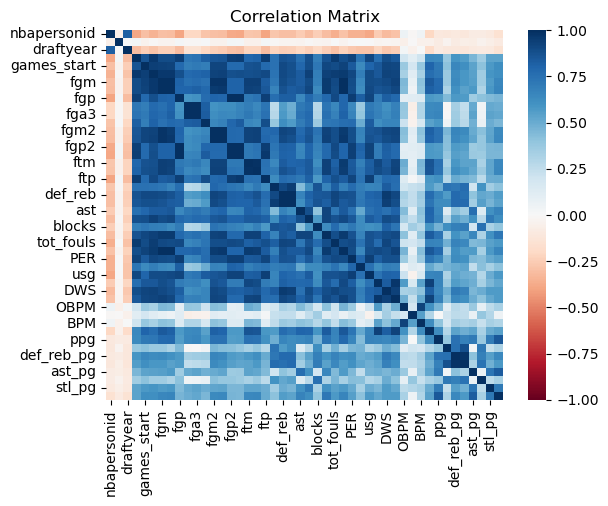

In [59]:
# Think about feature correlation
import matplotlib.pyplot as plt
correlation_map = data.corr()

norm = plt.Normalize(-1,1)
sns.heatmap(correlation_map, cmap = 'RdBu', norm = norm).set_title(label = "Correlation Matrix")

In [60]:
# Many features are correlated, drop some
data = data.drop(['fgm', 'fgp', 'ftm', 'fgm2', 'fgm3', 'tot_reb'], axis=1)

In [61]:
train_data = data[data['draftyear'] <= 2015].copy()
train_data

,nbapersonid,draftpick,draftyear,player,games,games_start,mins,fga,fga3,fgp3,...,BPM,VORP,ppg,off_reb_pg,def_reb_pg,tot_reb_ppg,ast_pg,blk_pg,stl_pg,tov_pg
0,15,15.0,1994,Eric Piatkowski,16,0,113,33,26,0.423,...,-2.5,0.0,2.437500,0.062500,0.687500,0.750000,0.625000,0.062500,0.000000,0.375000
1,87,4.0,1991,Dikembe Mutombo,48,27,715,93,0,0.000,...,-1.7,0.5,2.791667,1.666667,3.166667,4.833333,0.104167,1.229167,0.229167,0.479167
2,109,11.0,1992,Robert Horry,45,5,583,119,70,0.257,...,0.4,0.4,2.488889,0.777778,1.644444,2.422222,1.044444,0.422222,0.466667,0.488889
3,136,29.0,1992,P.J. Brown,18,0,209,41,1,0.000,...,-2.7,0.0,2.166667,1.611111,2.166667,3.777778,0.555556,0.444444,0.277778,0.555556
4,185,1.0,1993,Chris Webber,9,8,126,31,0,0.000,...,-1.1,0.0,3.888889,0.222222,3.333333,3.555556,2.000000,0.666667,0.444444,1.222222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,1629740,0.0,2013,Nicolo Melli,105,12,1608,464,291,0.857,...,-8.6,0.0,5.038095,0.638095,2.238095,2.876190,1.200000,0.247619,0.457143,0.552381
1533,1629742,0.0,2015,Stanton Kidd,4,0,15,3,1,0.000,...,-17.0,-0.1,0.000000,0.000000,0.750000,0.750000,0.250000,0.000000,0.000000,0.500000
1537,1629750,0.0,2015,Javonte Green,154,49,2460,553,164,1.322,...,-1.9,1.2,5.045455,0.915584,1.941558,2.857143,0.668831,0.298701,0.772727,0.467532
1632,1630267,0.0,2013,Facundo Campazzo,130,23,2609,611,409,0.653,...,-1.6,0.9,5.600000,0.346154,1.584615,1.930769,3.476923,0.284615,1.092308,1.076923


In [62]:
train_data = train_data.merge(player_categories, how = 'left', left_on = 'nbapersonid', right_on = 'nbapersonid')
train_data

,nbapersonid,draftpick,draftyear,player,games,games_start,mins,fga,fga3,fgp3,...,VORP,ppg,off_reb_pg,def_reb_pg,tot_reb_ppg,ast_pg,blk_pg,stl_pg,tov_pg,outcome
0,15,15.0,1994,Eric Piatkowski,16,0,113,33,26,0.423,...,0.0,2.437500,0.062500,0.687500,0.750000,0.625000,0.062500,0.000000,0.375000,0.0
1,87,4.0,1991,Dikembe Mutombo,48,27,715,93,0,0.000,...,0.5,2.791667,1.666667,3.166667,4.833333,0.104167,1.229167,0.229167,0.479167,1.0
2,109,11.0,1992,Robert Horry,45,5,583,119,70,0.257,...,0.4,2.488889,0.777778,1.644444,2.422222,1.044444,0.422222,0.466667,0.488889,0.0
3,136,29.0,1992,P.J. Brown,18,0,209,41,1,0.000,...,0.0,2.166667,1.611111,2.166667,3.777778,0.555556,0.444444,0.277778,0.555556,0.0
4,185,1.0,1993,Chris Webber,9,8,126,31,0,0.000,...,0.0,3.888889,0.222222,3.333333,3.555556,2.000000,0.666667,0.444444,1.222222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1122,1629740,0.0,2013,Nicolo Melli,105,12,1608,464,291,0.857,...,0.0,5.038095,0.638095,2.238095,2.876190,1.200000,0.247619,0.457143,0.552381,1.0
1123,1629742,0.0,2015,Stanton Kidd,4,0,15,3,1,0.000,...,-0.1,0.000000,0.000000,0.750000,0.750000,0.250000,0.000000,0.000000,0.500000,0.0
1124,1629750,0.0,2015,Javonte Green,154,49,2460,553,164,1.322,...,1.2,5.045455,0.915584,1.941558,2.857143,0.668831,0.298701,0.772727,0.467532,1.0
1125,1630267,0.0,2013,Facundo Campazzo,130,23,2609,611,409,0.653,...,0.9,5.600000,0.346154,1.584615,1.930769,3.476923,0.284615,1.092308,1.076923,2.0


In [63]:
# Construct x,y training data
x_train = train_data.drop(['outcome', 'nbapersonid', 'player'], axis=1)
y_train = train_data['outcome']

In [64]:
# Get X data for players drafted from 2018 to 2021
x_test = data[(data['draftyear'] >= 2018) & (data['draftyear'] <= 2021)]
x_test = x_test.drop(['nbapersonid', 'player'], axis=1)
x_test

,draftpick,draftyear,games,games_start,mins,fga,fga3,fgp3,fga2,fgp2,...,BPM,VORP,ppg,off_reb_pg,def_reb_pg,tot_reb_ppg,ast_pg,blk_pg,stl_pg,tov_pg
1203,0.0,2018,2,0,7,6,2,0.000,4,0.500,...,-12.4,0.0,3.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.500000,1.000000
1309,0.0,2018,10,1,120,39,12,0.250,27,0.370,...,-7.3,-0.2,3.700000,1.100000,1.500000,2.600000,1.300000,0.000000,0.100000,0.800000
1310,21.0,2018,192,101,4198,1412,903,1.527,509,1.992,...,-7.6,1.2,9.406250,0.322917,2.229167,2.552083,1.484375,0.177083,0.562500,0.817708
1311,60.0,2018,22,0,87,16,0,0.000,16,1.300,...,-26.4,-0.2,0.954545,0.272727,0.772727,1.045455,0.136364,0.181818,0.181818,0.590909
1312,27.0,2020,32,6,252,58,0,0.000,58,1.199,...,-6.3,0.0,3.000000,0.687500,1.937500,2.625000,0.000000,0.468750,0.062500,0.468750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,0.0,2021,2,0,6,3,1,0.000,2,0.000,...,-34.1,0.0,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,0.000000,0.000000
1720,0.0,2021,3,0,31,11,2,0.000,9,0.556,...,-7.1,0.0,4.000000,1.333333,1.666667,3.000000,0.000000,0.333333,0.333333,0.333333
1722,0.0,2021,5,0,74,20,15,0.133,5,0.800,...,-11.4,-0.2,2.800000,0.400000,2.600000,3.000000,0.400000,0.000000,0.200000,0.800000
1723,0.0,2020,3,0,46,14,6,0.333,8,0.375,...,-4.0,0.0,4.666667,2.000000,3.000000,5.000000,1.000000,0.333333,0.000000,0.000000


In [65]:
#Big dataset, run PCA. We first scale our data.

sc = StandardScaler()
sc.fit(x_train)
x_train_scaled = sc.transform(x_train)
x_test_scaled = sc.transform(x_test)

pca = PCA()
pca_x_train = pca.fit_transform(x_train_scaled)

In [66]:
#We need to find the ideal number of components. 80% explained cumulative variance is a good threshold.

explained_variance_ratios = pca.explained_variance_ratio_

cum_evr = [0 for element in range(len(explained_variance_ratios))]
cum_evr[0] = explained_variance_ratios[0]
for x in range(1, len(explained_variance_ratios)):
    cum_evr[x] = cum_evr[x - 1] + explained_variance_ratios[x]

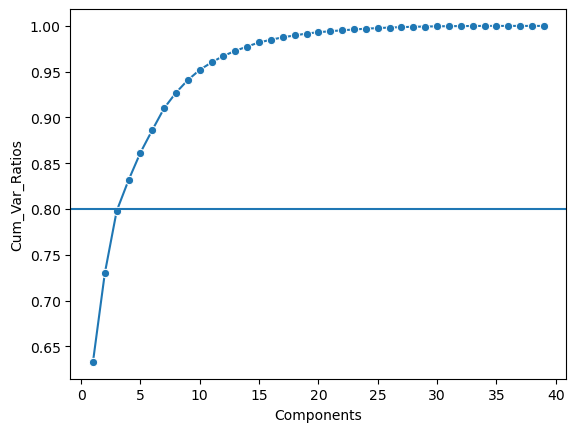

In [67]:
cum_df = pd.DataFrame()
cum_df['Components'] = range(1, len(cum_evr) + 1)
cum_df['Cum_Var_Ratios'] = cum_evr

plot_cum = sns.lineplot(data = cum_df, x='Components', y='Cum_Var_Ratios', marker = "o")
plot_cum.axhline(0.8)

plt.show()

In [68]:
#With 4 componenets, we get around our threshold.

n = 4

improved_pca = PCA(n_components= n)
improved_pca_x = improved_pca.fit_transform(x_train_scaled)

x_test_pca = improved_pca.transform(x_test_scaled)

In [69]:
# Use a logistic regression classifier
logistic = LogisticRegression(max_iter=1000).fit(improved_pca_x, y_train)
y_pred = logistic.predict(x_test_pca)
y_pred_probabilities = logistic.predict_proba(x_test_pca)

In [70]:
final_predictions = data[(data['draftyear'] >= 2018) & (data['draftyear'] <= 2021)].copy()
final_predictions = final_predictions[['player']].reset_index().drop(['index'], axis=1)
final_predictions['Prob. Out of League'] = pd.Series(y_pred_probabilities[:,0])
final_predictions['Prob. Roster'] = pd.Series(y_pred_probabilities[:,1])
final_predictions['Prob. Rotation'] = pd.Series(y_pred_probabilities[:,2])
final_predictions['Prob. Starter'] = pd.Series(y_pred_probabilities[:,3])
final_predictions['Prob. All-Star'] = pd.Series(y_pred_probabilities[:,4])
final_predictions['Prob. Elite'] = pd.Series(y_pred_probabilities[:,5])
final_predictions

,player,Prob. Out of League,Prob. Roster,Prob. Rotation,Prob. Starter,Prob. All-Star,Prob. Elite
0,Paris Bass,0.810087,0.176806,0.012517,0.000588,1.187698e-06,1.005253e-07
1,Rawle Alkins,0.834676,0.152127,0.012565,0.000630,1.566611e-06,1.710797e-07
2,Grayson Allen,0.283450,0.435026,0.247899,0.033479,1.355188e-04,1.072089e-05
3,Kostas Antetokounmpo,0.849258,0.144447,0.006208,0.000087,3.288374e-08,1.101140e-09
4,Udoka Azubuike,0.864812,0.124598,0.010251,0.000339,4.202400e-07,4.297803e-08
...,...,...,...,...,...,...,...
391,Jordan Goodwin,0.924768,0.073760,0.001458,0.000014,5.305436e-09,1.691906e-10
392,Micah Potter,0.853899,0.135871,0.009775,0.000454,8.871089e-07,1.037786e-07
393,Aleem Ford,0.851511,0.138692,0.009409,0.000387,7.524853e-07,7.186988e-08
394,Cameron McGriff,0.824354,0.161736,0.013016,0.000891,2.226242e-06,3.333494e-07


In [71]:
def getOutcome(x):
    if x == 5:
        return 'Elite'

    if x == 4:
        return 'All-Star'

    if x == 3:
        return 'Starter'

    if x == 2:
        return 'Rotation'

    if x == 1:
        return 'Roster'

    return 'Out of League'

final_predictions['Career Outcome'] = pd.Series(y_pred.tolist()).apply(getOutcome)
final_predictions

,player,Prob. Out of League,Prob. Roster,Prob. Rotation,Prob. Starter,Prob. All-Star,Prob. Elite,Career Outcome
0,Paris Bass,0.810087,0.176806,0.012517,0.000588,1.187698e-06,1.005253e-07,Out of League
1,Rawle Alkins,0.834676,0.152127,0.012565,0.000630,1.566611e-06,1.710797e-07,Out of League
2,Grayson Allen,0.283450,0.435026,0.247899,0.033479,1.355188e-04,1.072089e-05,Roster
3,Kostas Antetokounmpo,0.849258,0.144447,0.006208,0.000087,3.288374e-08,1.101140e-09,Out of League
4,Udoka Azubuike,0.864812,0.124598,0.010251,0.000339,4.202400e-07,4.297803e-08,Out of League
...,...,...,...,...,...,...,...,...
391,Jordan Goodwin,0.924768,0.073760,0.001458,0.000014,5.305436e-09,1.691906e-10,Out of League
392,Micah Potter,0.853899,0.135871,0.009775,0.000454,8.871089e-07,1.037786e-07,Out of League
393,Aleem Ford,0.851511,0.138692,0.009409,0.000387,7.524853e-07,7.186988e-08,Out of League
394,Cameron McGriff,0.824354,0.161736,0.013016,0.000891,2.226242e-06,3.333494e-07,Out of League


In [72]:
# Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.
specific_pred = final_predictions[(final_predictions['player'] == 'Shai Gilgeous-Alexander') |
                                  (final_predictions['player'] == 'Zion Williamson') |
                                  (final_predictions['player'] == 'James Wiseman') |
                                  (final_predictions['player'] == 'Josh Giddey')]
specific_pred

,player,Prob. Out of League,Prob. Roster,Prob. Rotation,Prob. Starter,Prob. All-Star,Prob. Elite,Career Outcome
22,Shai Gilgeous-Alexander,0.000307,0.009917,0.155585,0.712585,0.088856,0.032750,Starter
138,Zion Williamson,0.003520,0.052862,0.144829,0.685425,0.078326,0.035038,Starter
227,James Wiseman,0.449726,0.445161,0.080409,0.024476,0.000193,0.000035,Out of League
362,Josh Giddey,0.018801,0.178666,0.174292,0.557908,0.053754,0.016579,Starter


### Model Overview 

   My model utilizes a logistic regression, which is often used for classification and predictive analytics. In this case, the logistic regression model is estimating the probability of each player being placed into each career category. The model is first split into a training dataset and then a testing dataset. The training dataset consists of players drafted before 2015 and the testing dataset consists of players after 2015. The important features that we wanted to include in the model consists of mostly all the data in the player_data dataset (mainly draft pick number,	draft year,	games played, games started, points, minutes played, etc). Because the dataset was rather large, we had to run principal component analysis to reduce the dimensions. This ultimately led to me using 4 components to get an 80% threshhold. I then ran the logistic regression classifier to get the probability of each player being classified as each career outcome. This allowed me to predict the outcome of each player such as SGA, Zion Williamson, James Wiseman, ad Josh Giddey.
  
   One strength of my model is the addition of a principal component analysis, cumulative variance visual, and seaborn heatmap. I believe that these visuals help provide a clear visual of the data and makes it more interpretable to the average viewer. One weakness of my model is that there are a lot of correlated features that might mess up the model. There is also no MVP voting prior to 2011. The logistic regression model is also rather basic and a more complex model may provide better results.
  
   One way I would address these issues is to implement a random forest model, which would probably provide better results. This would allow for the weights of the features to be more finely tuned so that certain features are more weighted than others. A random forest model also does not assume a linear relationship unlike the logistic regression. It would also provide a lower bias and variance.

## Part 2 -- Predicting Team Stats  

In this section, I'm going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  

### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

I'll calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [73]:
rebounding_data
rebounding_data_OKC = rebounding_data[rebounding_data['team'] == 'OKC'].copy()
rebounding_data_OKC

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714
...,...,...,...,...,...,...,...
2297,OKC,IND,2023-03-31,78,13,49,0.265306
2342,OKC,PHX,2023-04-02,79,20,56,0.357143
2375,OKC,GSW,2023-04-04,80,15,55,0.272727
2399,OKC,UTA,2023-04-06,81,21,61,0.344262


In [74]:
# Calculate the total number of offensive rebounds from games 1-80

tot_off_reb = rebounding_data_OKC['offensive_rebounds'].iloc[0:80].sum()
tot_off_reb

1192

In [75]:
# Calculate the total number of offensive rebound chances from games 1-80

tot_off_reb_ch = rebounding_data_OKC['off_rebound_chances'].iloc[0:80].sum()
tot_off_reb_ch

4129

In [76]:
# Predict OKC's offensive rebound chance for game 81

game81_off_reb = tot_off_reb / tot_off_reb_ch
game81_off_reb * 100

28.8689755388714

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.9%

### Limitations

There are a few limitations to the method I used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.   

 One method could be to include which players are injured during each game. Then when trying to predict the offensive rebounds for the next game with specific players, we can filter our prediction based on who is injured so that the prediction is more accurate. For example, if Josh Giddey was injured for the 81st game, we could filter our offensive rebound prediction to only the games were Josh Giddey was injured from games 0-80, providing a more accurate prediction for the 81st game. Likewise, if Josh Giddey is playing in the 81st game, and he was injured 10 times from games 0-80, we can base our offensive rebound prediction for the 81st game on either a combination of all games or just those games that Josh Giddey was playing in.

### Potential Weaknesses

Another weakness of the original model is the lack of other factors that could influence the offensive rebound percentage. For example, other factors such as opposing team matchup, defensive performance, home vs. aways games, and many other factors could all impact the offensive rebound percentage of a certain game. One way to account for this is to model the prediction using some sort of regression model where you can add more features to the prediction that will influence the outcome of the prediction.

Another weakness of the model is that it does not take into account trends within a season. Oftentimes, a basketball team can go on stretches of games where they excel, and other times can go on stretches of games where they struggle. This can be accounted for by implementing an additional analysis where you split every 10 games (or however many games you think is satisfactory) into its own "mini season", that way you can more accurately account for any trends that a team might be in. That way you gain a sense of how the team is performing throughout the whole season and also relatively to when you are performing the analysis.

A final weakness of the model is that it doesn't take into account data from previous seasons. This is important because the trends from previous seasons can provide valuable insight into how the current season is performing. For example, Lebron James is notoriously known for increasing the level of his play before he enters the playoffs. This trend would not have been accounted for when only analyzing the current season and not the prior seasons as well. This issue could be addressed by adding in additional analysis from previous seasons and trends from previous seasons in addition to the analysis of the current season. That way you can gain a sense of how the current season is performing according to previous seasons, which can provide valuable insight into the prediction.